In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [23]:
# Configuración de directorios
data_dir = "../dataset/dataset"
train_dir = os.path.join(data_dir, "train")
valid_dir = os.path.join(data_dir, "valid")
test_dir = os.path.join(data_dir, "test")

In [24]:
# Parámetros del modelo
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 20

In [25]:
# Preprocesamiento de imágenes
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

Found 4798 images belonging to 11 classes.
Found 1031 images belonging to 11 classes.
Found 1033 images belonging to 11 classes.


In [26]:
# Cargar MobileNetV2 preentrenado
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights="imagenet")
base_model.trainable = False  # Congelar las capas preentrenadas


In [27]:
# Construcción del modelo
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation="softmax")
])

In [28]:

# Resumen del modelo
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,371 (9.24 MB)

 Trainable params: 165,387 (646.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [29]:
model.compile(optimizer='adam',  # You can choose other optimizers like 'sgd', 'rmsprop', etc.
              loss='binary_crossentropy',  # This depends on your application, could also be 'categorical_crossentropy', 'mse', etc.
              metrics=['accuracy'])  # You can add other metrics such as 'mae', 'precision', 'recall', etc.

# Now you can fit the model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=EPOCHS
)


Epoch 1/20


c:\Users\Willi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 197ms/step - accuracy: 0.4322 - loss: 0.2942 - val_accuracy: 0.8041 - val_loss: 0.0981
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 27s 178ms/step - accuracy: 0.7639 - loss: 0.1220 - val_accuracy: 0.8477 - val_loss: 0.0793
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 29s 192ms/step - accuracy: 0.8339 - loss: 0.0912 - val_accuracy: 0.8632 - val_loss: 0.0740
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 29s 196ms/step - accuracy: 0.8554 - loss: 0.0778 - val_accuracy: 0.8555 - val_loss: 0.0725
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 30s 202ms/step - accuracy: 0.8711 - loss: 0.0693 - val_accuracy: 0.8623 - val_loss: 0.0711
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 219ms/step - accuracy: 0.8975 - loss: 0.0586 - val_accuracy: 0.8720 - val_loss: 0.0703
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 31s 205ms/step - accuracy: 0.9130 - loss: 0.0519 - val_accuracy: 0.8642 - val_loss: 0.0708
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 29s 194ms/step - accuracy: 0.9264 - loss: 0.0456 - val

In [30]:
# Evaluación del modelo en el conjunto de prueba
loss, accuracy = model.evaluate(test_generator)
print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")


33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - accuracy: 0.8615 - loss: 0.0809
Precisión en el conjunto de prueba: 84.12%


In [31]:
# Generar predicciones
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())


33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 192ms/step


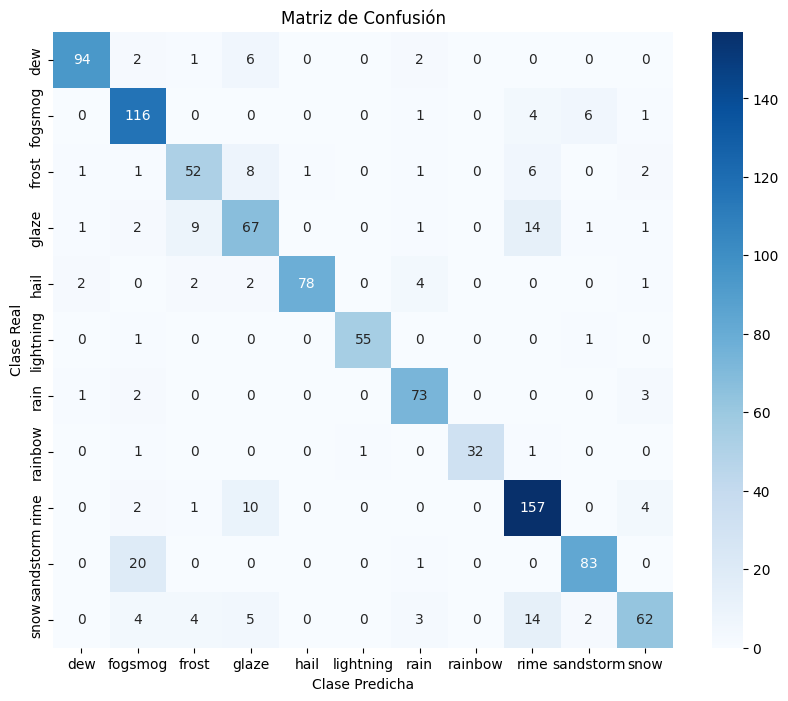

In [32]:

# Matriz de confusión
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Matriz de Confusión")
plt.ylabel("Clase Real")
plt.xlabel("Clase Predicha")
plt.show()

In [33]:
# Reporte de clasificación
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("\nReporte de Clasificación:\n")
print(report)



Reporte de Clasificación:

              precision    recall  f1-score   support

         dew       0.95      0.90      0.92       105
     fogsmog       0.77      0.91      0.83       128
       frost       0.75      0.72      0.74        72
       glaze       0.68      0.70      0.69        96
        hail       0.99      0.88      0.93        89
   lightning       0.98      0.96      0.97        57
        rain       0.85      0.92      0.88        79
     rainbow       1.00      0.91      0.96        35
        rime       0.80      0.90      0.85       174
   sandstorm       0.89      0.80      0.84       104
        snow       0.84      0.66      0.74        94

    accuracy                           0.84      1033
   macro avg       0.86      0.84      0.85      1033
weighted avg       0.85      0.84      0.84      1033



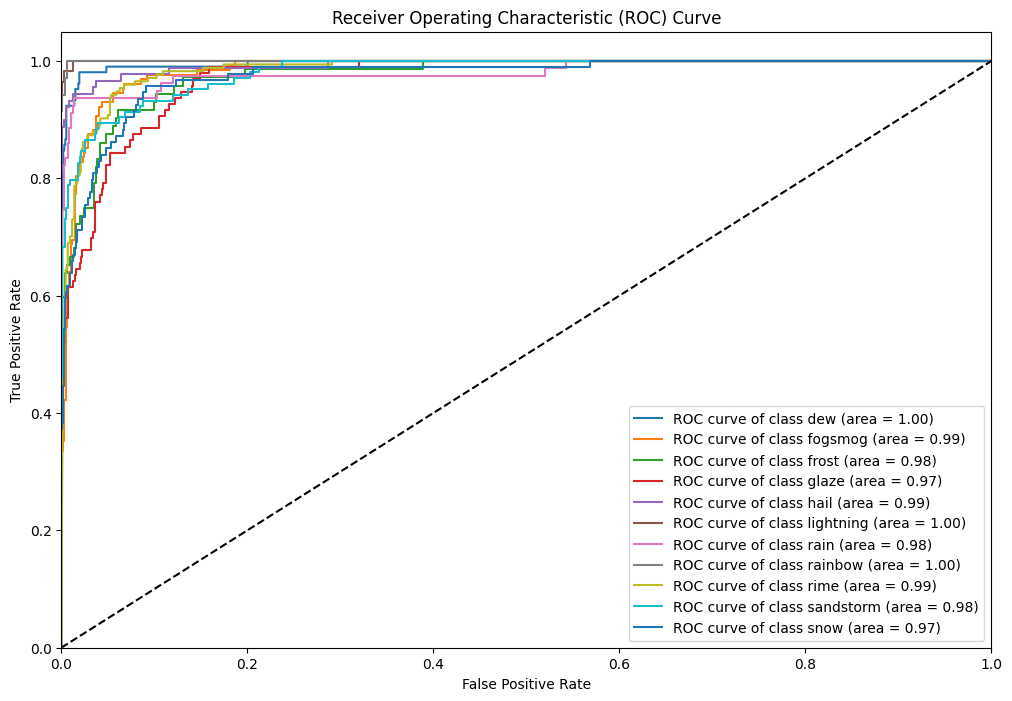

In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true classes
true_classes_binarized = label_binarize(true_classes, classes=range(len(class_labels)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(true_classes_binarized[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {class_labels[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

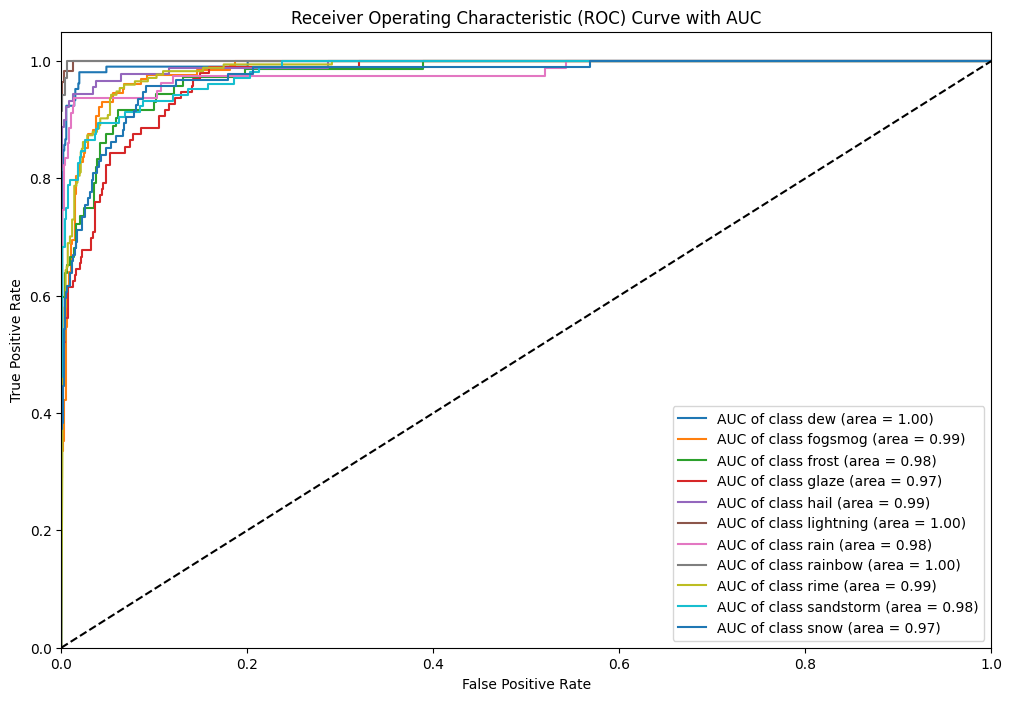

In [35]:
# Plot AUC for each class
plt.figure(figsize=(12, 8))
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label=f'AUC of class {class_labels[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with AUC')
plt.legend(loc="lower right")
plt.show()

In [45]:
# Suponiendo que 'model' es tu modelo ya modificado y listo para guardar.
model.save("./model/model/climate_classifier_v3.h5")
print("Modelo guardado en 'climate_classifier_v3.h5'")


Modelo guardado en 'climate_classifier_v3.h5'


In [43]:
model_path = os.path.abspath("Backend/model/model/climate_classifier_v3.h5")
print(f"Ruta absoluta del modelo: {model_path}")



Ruta absoluta del modelo: c:\Users\Willi\Downloads\ProyectoClasificadorImagenes\NuevoClasificadorImagenesClima\Backend\model\Backend\model\model\climate_classifier_v3.h5


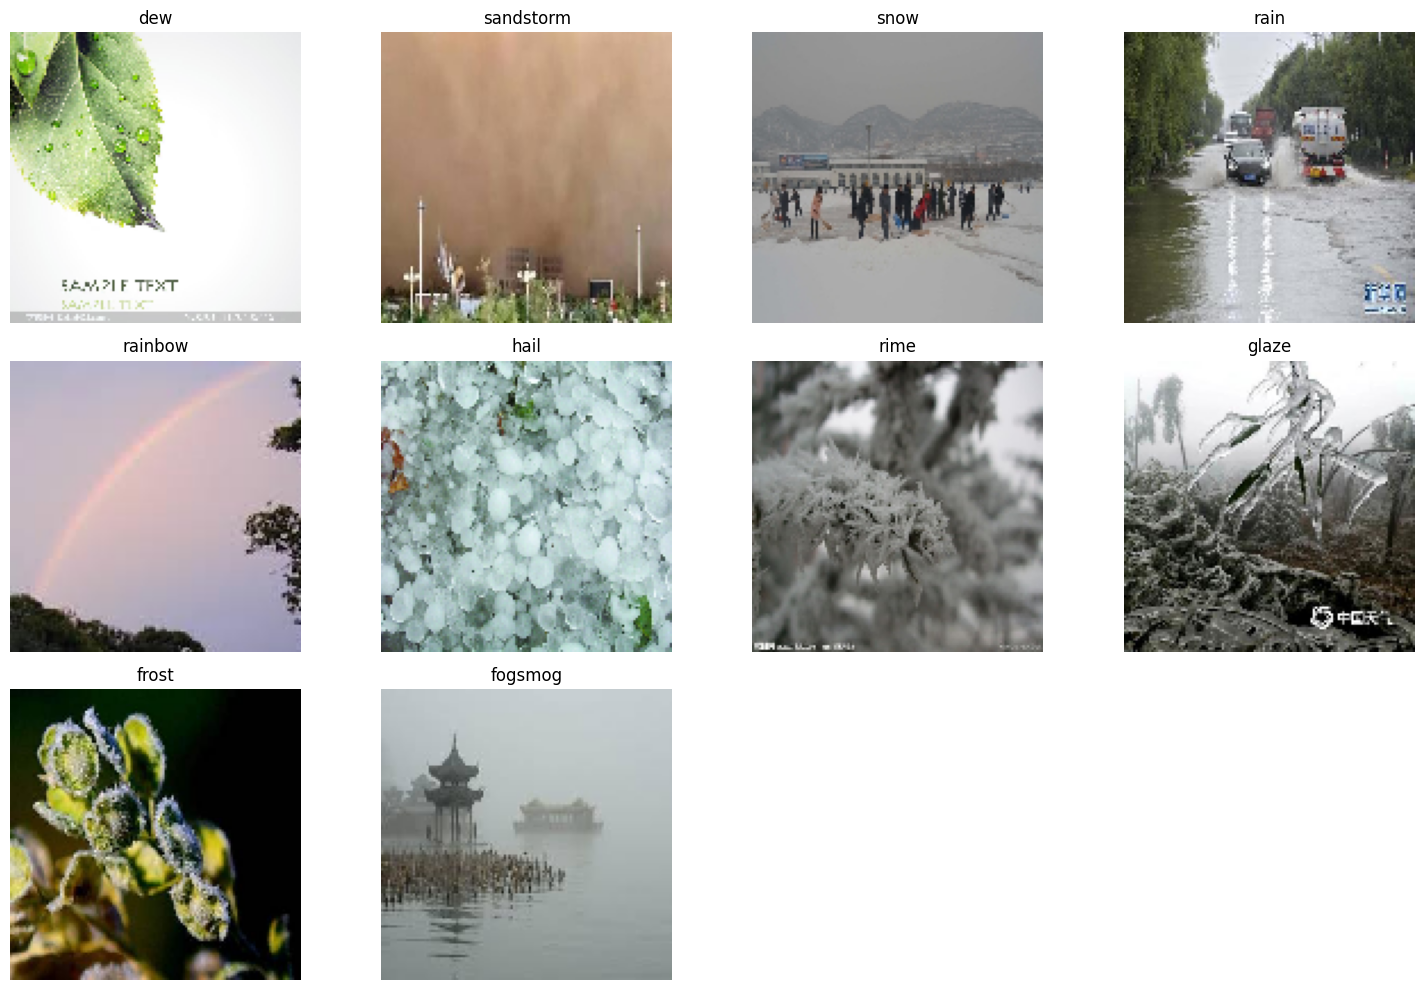

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener un lote de imágenes y etiquetas
images, labels = next(train_generator)

# Obtener los índices de clase
class_indices = train_generator.class_indices
class_indices = {v: k for k, v in class_indices.items()}

# Crear un diccionario para almacenar una imagen por clase
class_images = {}

# Iterar sobre las imágenes y etiquetas
for img, label in zip(images, labels):
    class_idx = np.argmax(label)
    class_name = class_indices[class_idx]
    if class_name not in class_images:
        # Revertir la normalización para visualización
        img_display = (img * 127.5 + 127.5).astype('uint8')
        class_images[class_name] = img_display
    if len(class_images) == len(class_indices):
        break

# Mostrar las imágenes
plt.figure(figsize=(15, 10))
for i, (class_name, img) in enumerate(class_images.items()):
    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')
plt.tight_layout()
plt.show()


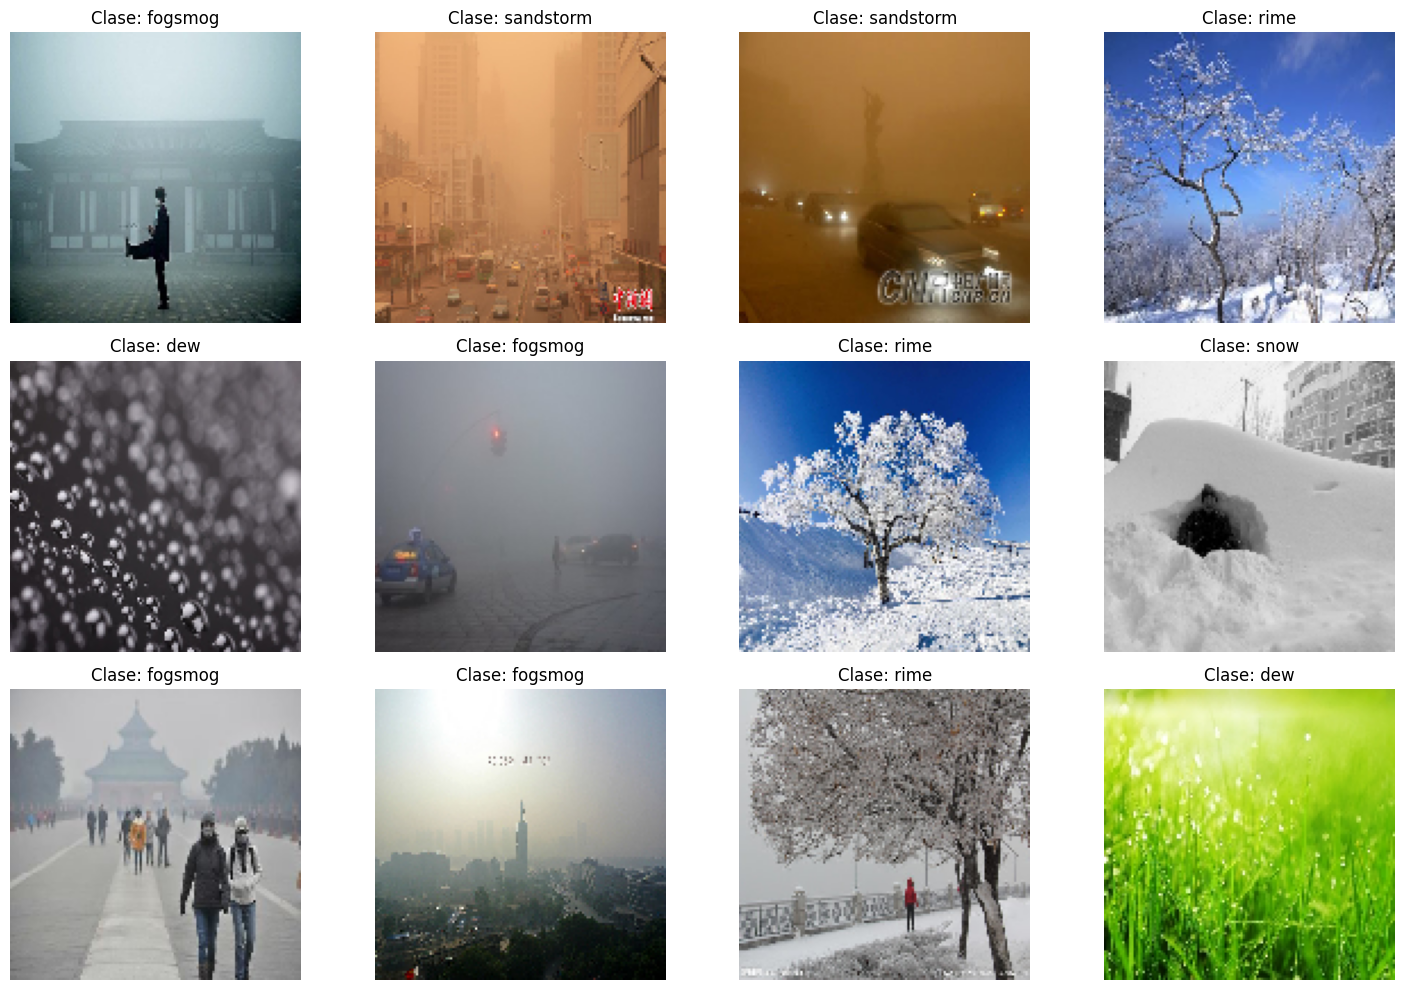

In [39]:
# Obtener un lote de imágenes procesadas desde el generador
images, labels = next(train_generator)

# Mostrar las imágenes procesadas con sus etiquetas
plt.figure(figsize=(15, 10))
for i in range(12):  # Mostrar 12 imágenes
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow((images[i] * 127.5 + 127.5).astype('uint8'))  # Revertir la normalización
    plt.title(f"Clase: {class_labels[np.argmax(labels[i])]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [49]:
from tensorflow.keras.preprocessing import image

# Load the image
img_path = "C:/Users/Willi/Downloads/imagen_prueba3.jpg"
img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make a prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
predicted_label = class_labels[predicted_class[0]]

print(f"La imagen pertenece a la clase: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
La imagen pertenece a la clase: rainbow
